# Mixed Submission

In [9]:
import pandas as pd
import numpy as np

In [3]:
m008 = pd.read_csv('../submissions/M008_0608_1739_submission_lgb_5folds_0.9044CV_500000iter_0.5lr.csv')

In [4]:
m014_p1 = pd.read_csv('../temp/temp4of8_M014_0611_1249_submission_lgb_5folds_500000iter_0.3lr.csv')

In [16]:
m014_p1 = m014_p1.replace(0, 'na')

In [12]:
m008.head()

,id,scalar_coupling_constant
0,4658147,7.079373
1,4658148,191.982473
2,4658149,4.718975
3,4658150,183.006768
4,4658151,4.805077


In [18]:
m014_p1.head()

,id,scalar_coupling_constant
0,4658147,NaN
1,4658148,180.155053
2,4658149,NaN
3,4658150,169.004495
4,4658151,NaN


In [20]:
m014_p1['scalar_coupling_constant'] = m014_p1['scalar_coupling_constant'].fillna(m008['scalar_coupling_constant'])

In [21]:
m014_p1.to_csv('../submissions/HYBRID_M014_M008.csv', index=False)

In [54]:
first_list = ['molecule_atom_index_0_dist_min',
            'molecule_atom_index_0_dist_max',
            'molecule_atom_index_1_dist_min',
            'molecule_atom_index_0_dist_mean',
            'molecule_atom_index_0_dist_std',
            'dist',
            'molecule_atom_index_1_dist_std',
            'molecule_atom_index_1_dist_max',
            'molecule_atom_index_1_dist_mean',
            'molecule_atom_index_0_dist_max_diff',
            'molecule_atom_index_0_dist_max_div',
            'molecule_atom_index_0_dist_std_diff',
            'molecule_atom_index_0_dist_std_div',
            'atom_0_couples_count',
            'molecule_atom_index_0_dist_min_div',
            'molecule_atom_index_1_dist_std_diff',
            'molecule_atom_index_0_dist_mean_div',
            'atom_1_couples_count',
            'molecule_atom_index_0_dist_mean_diff',
            'molecule_couples',
            'atom_index_1',
            'molecule_dist_mean',
            'molecule_atom_index_1_dist_max_diff',
            'molecule_atom_index_0_y_1_std',
            'molecule_atom_index_1_dist_mean_diff',
            'molecule_atom_index_1_dist_std_div',
            'molecule_atom_index_1_dist_mean_div',
            'molecule_atom_index_1_dist_min_diff',
            'molecule_atom_index_1_dist_min_div',
            'molecule_atom_index_1_dist_max_div',
            'molecule_atom_index_0_z_1_std',
            'y_0',
            'molecule_type_dist_std_diff',
            'molecule_atom_1_dist_min_diff',
            'molecule_atom_index_0_x_1_std',
            'molecule_dist_min',
            'molecule_atom_index_0_dist_min_diff',
            'molecule_atom_index_0_y_1_mean_diff',
            'molecule_type_dist_min',
            'molecule_atom_1_dist_min_div',
            'atom_index_0',
            'molecule_dist_max',
            'molecule_atom_1_dist_std_diff',
            'molecule_type_dist_max',
            'molecule_atom_index_0_y_1_max_diff',
            'molecule_type_0_dist_std_diff',
            'molecule_type_dist_mean_diff',
            'molecule_atom_1_dist_mean',
            'molecule_atom_index_0_y_1_mean_div',
            'molecule_type_dist_mean_div']

In [23]:
second_list = ['type',
            'molecule_atom_index_0_dist_std_div', 'atom_index_0',
            'molecule_atom_index_1_dist_max_diff',
            'molecule_atom_index_1_dist_std_div',
            'molecule_atom_index_0_dist_max_diff', 'molecule_dist_mean', 'dist',
            'molecule_dist_max', 'molecule_atom_index_1_dist_std_diff',
            'molecule_atom_index_0_dist_std_diff', 'molecule_atom_index_1_dist_max',
            'molecule_atom_index_0_dist_std',
            'molecule_atom_index_0_dist_mean_diff',
            'molecule_atom_index_0_dist_max', 'molecule_couples',
            'molecule_atom_index_0_dist_mean_div',
            'molecule_atom_index_1_dist_max_div',
            'molecule_atom_index_0_dist_max_div',
            'molecule_atom_index_1_dist_mean_diff',
            'molecule_atom_index_1_dist_std', 'molecule_atom_index_1_dist_min',
            'dist_to_type_std', 'molecule_atom_index_1_dist_mean',
            'atom_0_couples_count', 'molecule_atom_index_1_dist_mean_div',
            'atom_1_couples_count', 'dist_to_type_mean']

In [25]:
def Diff(li1, li2): 
    return (list(set(li1) - set(li2))) 

In [55]:
# first_list = [1, 2, 2, 5]
# second_list = [2, 5, 7, 9]

in_first = set(first_list)
in_second = set(second_list)

in_second_but_not_in_first = in_second - in_first

result = first_list + list(in_second_but_not_in_first)

In [57]:
fe001 = pd.read_csv('../data/FE001-test_features.csv')

In [58]:
fe004 = pd.read_csv('../data/FE004-test.csv')

In [59]:
fe001.head()

,Unnamed: 0,id,molecule_name,atom_index_0,atom_index_1,type,atom_0,x_0,y_0,z_0,atom_1,x_1,y_1,z_1,dist,dist_x,dist_y,dist_z,type_0,molecule_couples,molecule_dist_mean,molecule_dist_min,molecule_dist_max,atom_0_couples_count,atom_1_couples_count,molecule_atom_index_0_x_1_std,molecule_atom_index_0_y_1_mean,molecule_atom_index_0_y_1_mean_diff,molecule_atom_index_0_y_1_mean_div,molecule_atom_index_0_y_1_max,molecule_atom_index_0_y_1_max_diff,molecule_atom_index_0_y_1_std,molecule_atom_index_0_z_1_std,molecule_atom_index_0_dist_mean,molecule_atom_index_0_dist_mean_diff,molecule_atom_index_0_dist_mean_div,molecule_atom_index_0_dist_max,molecule_atom_index_0_dist_max_diff,molecule_atom_index_0_dist_max_div,molecule_atom_index_0_dist_min,molecule_atom_index_0_dist_min_diff,molecule_atom_index_0_dist_min_div,molecule_atom_index_0_dist_std,molecule_atom_index_0_dist_std_diff,molecule_atom_index_0_dist_std_div,molecule_atom_index_1_dist_mean,molecule_atom_index_1_dist_mean_diff,molecule_atom_index_1_dist_mean_div,molecule_atom_index_1_dist_max,molecule_atom_index_1_dist_max_diff,molecule_atom_index_1_dist_max_div,molecule_atom_index_1_dist_min,molecule_atom_index_1_dist_min_diff,molecule_atom_index_1_dist_min_div,molecule_atom_index_1_dist_std,molecule_atom_index_1_dist_std_diff,molecule_atom_index_1_dist_std_div,molecule_atom_1_dist_mean,molecule_atom_1_dist_min,molecule_atom_1_dist_min_diff,molecule_atom_1_dist_min_div,molecule_atom_1_dist_std,molecule_atom_1_dist_std_diff,molecule_type_0_dist_std,molecule_type_0_dist_std_diff,molecule_type_dist_mean,molecule_type_dist_mean_diff,molecule_type_dist_mean_div,molecule_type_dist_max,molecule_type_dist_min,molecule_type_dist_std,molecule_type_dist_std_diff
0,0,4658147,dsgdb9nsd_000004,2,0,2JHC,H,-1.662,0.0,1.0,C,0.5996,0.0,1.0,2.2620,5.113,0.0,0.0,2,5,1.994,1.0625,3.324,3,2,1.132,0.0,0.0,NaN,0.0,0.0,0.0,0.0,2.217,-0.04492,0.980,3.324,1.0625,1.470,1.0625,-1.199,0.4697,1.132,-1.13000,0.5005,1.662,-0.5996,0.735,2.262,0.000,1.000,1.0625,-1.199,0.4697,0.848,-1.4140,0.3750,1.662,1.0625,-1.199,0.4697,0.6924,-1.569,0.0,-2.2620,2.2620,0.0,1.0,2.2620,2.2620,0.0,-2.2620
1,1,4658148,dsgdb9nsd_000004,2,1,1JHC,H,-1.662,0.0,1.0,C,-0.5996,0.0,1.0,1.0625,1.128,0.0,0.0,1,5,1.994,1.0625,3.324,3,2,1.132,0.0,0.0,NaN,0.0,0.0,0.0,0.0,2.217,1.15400,2.086,3.324,2.2620,3.129,1.0625,0.000,1.0000,1.132,0.06934,1.0650,1.662,0.5996,1.564,2.262,1.199,2.129,1.0625,0.000,1.0000,0.848,-0.2144,0.7983,1.662,1.0625,0.000,1.0000,0.6924,-0.370,0.0,-1.0625,1.0625,0.0,1.0,1.0625,1.0625,0.0,-1.0625
2,2,4658149,dsgdb9nsd_000004,2,3,3JHH,H,-1.662,0.0,1.0,H,1.6620,0.0,1.0,3.3240,11.050,0.0,0.0,3,5,1.994,1.0625,3.324,3,1,1.132,0.0,0.0,NaN,0.0,0.0,0.0,0.0,2.217,-1.10700,0.667,3.324,0.0000,1.000,1.0625,-2.262,0.3196,1.132,-2.19100,0.3406,3.324,0.0000,1.000,3.324,0.000,1.000,3.3240,0.000,1.0000,NaN,NaN,NaN,3.324,3.3240,0.000,1.0000,NaN,NaN,NaN,NaN,3.3240,0.0,1.0,3.3240,3.3240,NaN,NaN
3,3,4658150,dsgdb9nsd_000004,3,0,1JHC,H,1.662,0.0,1.0,C,0.5996,0.0,1.0,1.0625,1.128,0.0,0.0,1,5,1.994,1.0625,3.324,2,2,0.848,0.0,0.0,NaN,0.0,0.0,0.0,0.0,1.662,0.59960,1.564,2.262,1.1990,2.129,1.0625,0.000,1.0000,0.848,-0.21440,0.7983,1.662,0.5996,1.564,2.262,1.199,2.129,1.0625,0.000,1.0000,0.848,-0.2144,0.7983,1.662,1.0625,0.000,1.0000,0.6924,-0.370,0.0,-1.0625,1.0625,0.0,1.0,1.0625,1.0625,0.0,-1.0625
4,4,4658151,dsgdb9nsd_000004,3,1,2JHC,H,1.662,0.0,1.0,C,-0.5996,0.0,1.0,2.2620,5.113,0.0,0.0,2,5,1.994,1.0625,3.324,2,2,0.848,0.0,0.0,NaN,0.0,0.0,0.0,0.0,1.662,-0.59960,0.735,2.262,0.0000,1.000,1.0625,-1.199,0.4697,0.848,-1.41400,0.3750,1.662,-0.5996,0.735,2.262,0.000,1.000,1.0625,-1.199,0.4697,0.848,-1.4140,0.3750,1.662,1.0625,-1.199,0.4697,0.6924,-1.569,0.0,-2.2620,2.2620,0.0,1.0,2.2620,2.2620,0.0,-2.2620


In [60]:
fe004.head()

,id,molecule_name,atom_index_0,atom_index_1,type,atom_0,x_0,y_0,z_0,atom_1,x_1,y_1,z_1,C,F,H,N,O,bonds,dist,abs_dist,dist_xy,abs_dist_xy,dist_xz,abs_dist_xz,dist_yz,abs_dist_yz,dist_to_type_mean,dist_to_type_std,dist_to_type_mean_xy,dist_to_type_mean_xz,dist_to_type_mean_yz,molecule_couples,molecule_dist_mean,molecule_dist_min,molecule_dist_max,atom_0_couples_count,atom_1_couples_count,molecule_atom_index_0_x_1_std,molecule_atom_index_0_y_1_mean,molecule_atom_index_0_y_1_mean_diff,molecule_atom_index_0_y_1_mean_div,molecule_atom_index_0_y_1_max,molecule_atom_index_0_y_1_max_diff,molecule_atom_index_0_y_1_std,molecule_atom_index_0_z_1_std,molecule_atom_index_0_dist_mean,molecule_atom_index_0_dist_mean_diff,molecule_atom_index_0_dist_mean_div,molecule_atom_index_0_dist_max,molecule_atom_index_0_dist_max_diff,molecule_atom_index_0_dist_max_div,molecule_atom_index_0_dist_min,molecule_atom_index_0_dist_min_diff,molecule_atom_index_0_dist_min_div,molecule_atom_index_0_dist_std,molecule_atom_index_0_dist_std_diff,molecule_atom_index_0_dist_std_div,molecule_atom_index_1_dist_mean,molecule_atom_index_1_dist_mean_diff,molecule_atom_index_1_dist_mean_div,molecule_atom_index_1_dist_max,molecule_atom_index_1_dist_max_diff,molecule_atom_index_1_dist_max_div,molecule_atom_index_1_dist_min,molecule_atom_index_1_dist_min_diff,molecule_atom_index_1_dist_min_div,molecule_atom_index_1_dist_std,molecule_atom_index_1_dist_std_diff,molecule_atom_index_1_dist_std_div,molecule_atom_1_dist_mean,molecule_atom_1_dist_min,molecule_atom_1_dist_min_diff,molecule_atom_1_dist_min_div,molecule_atom_1_dist_std,molecule_atom_1_dist_std_diff,molecule_bonds_dist_std,molecule_bonds_dist_std_diff,molecule_type_dist_mean,molecule_type_dist_mean_diff,molecule_type_dist_mean_div,molecule_type_dist_max,molecule_type_dist_min,molecule_type_dist_std,molecule_type_dist_std_diff,num_atoms,flatness_metric,bond_angle_plane,bond_angle_axis
0,4658147,dsgdb9nsd_000004,2,0,2JHC,H,-1.662,0.0,1.0,C,0.5996,0.0,1.0,2,0,2,0,0,2,2.2620,2.2620,2.2620,2.2620,2.2620,2.2620,0.0,0.0,1.0320,26.45,1.292,1.365,0.0,5,1.994,1.0625,3.324,3,2,1.1310,0.0,0.0,NaN,0.0,0.0,0.0,0.0,2.215,-0.04565,0.9800,3.324,1.0625,1.470,1.0625,-1.199,0.4697,1.1310,-1.13000,0.5005,1.662,-0.5996,0.735,2.262,0.000,1.000,1.0625,-1.199,0.4697,0.8477,-1.4130,0.3750,1.662,1.0625,-1.199,0.4697,0.6924,-1.5690,0.0,-2.2620,2.2620,0.0,1.0,2.2620,2.2620,0.0,-2.2620,4,0.0,0.0,90.0
1,4658148,dsgdb9nsd_000004,2,1,1JHC,H,-1.662,0.0,1.0,C,-0.5996,0.0,1.0,2,0,2,0,0,1,1.0625,1.0625,1.0625,1.0625,1.0625,1.0625,0.0,0.0,0.9717,157.00,1.272,1.181,0.0,5,1.994,1.0625,3.324,3,2,1.1310,0.0,0.0,NaN,0.0,0.0,0.0,0.0,2.215,1.15300,2.0860,3.324,2.2620,3.129,1.0625,0.000,1.0000,1.1310,0.06915,1.0650,1.662,0.5996,1.564,2.262,1.199,2.129,1.0625,0.000,1.0000,0.8477,-0.2142,0.7983,1.662,1.0625,0.000,1.0000,0.6924,-0.3699,0.0,-1.0625,1.0625,0.0,1.0,1.0625,1.0625,0.0,-1.0625,4,0.0,0.0,90.0
2,4658149,dsgdb9nsd_000004,2,3,3JHH,H,-1.662,0.0,1.0,H,1.6620,0.0,1.0,2,0,2,0,0,3,3.3240,3.3240,3.3240,3.3240,3.3240,3.3240,0.0,0.0,1.2300,12.56,1.527,1.654,0.0,5,1.994,1.0625,3.324,3,1,1.1310,0.0,0.0,NaN,0.0,0.0,0.0,0.0,2.215,-1.10700,0.6665,3.324,0.0000,1.000,1.0625,-2.262,0.3196,1.1310,-2.19100,0.3403,3.324,0.0000,1.000,3.324,0.000,1.000,3.3240,0.000,1.0000,NaN,NaN,NaN,3.324,3.3240,0.000,1.0000,NaN,NaN,NaN,NaN,3.3240,0.0,1.0,3.3240,3.3240,NaN,NaN,4,0.0,0.0,90.0
3,4658150,dsgdb9nsd_000004,3,0,1JHC,H,1.662,0.0,1.0,C,0.5996,0.0,1.0,2,0,2,0,0,1,1.0625,1.0625,1.0625,1.0625,1.0625,1.0625,0.0,0.0,0.9717,157.00,1.272,1.181,0.0,5,1.994,1.0625,3.324,2,2,0.8477,0.0,0.0,NaN,0.0,0.0,0.0,0.0,1.662,0.59960,1.5640,2.262,1.1990,2.129,1.0625,0.000,1.0000,0.8477,-0.21420,0.7983,1.662,0.5996,1.564,2.262,1.199,2.129,1.0625,0.000,1.0000,0.8477,-0.2142,0.7983,1.662,1.0625,0.000,1.0000,0.6924,-0.3699,0.0,-1.0625,1.0625,0.0,1.0,1.0625,1.0625,0.0,-1.0625,4,0.0,0.0,90.0
4,4658151,dsgdb9nsd_000004,3,1,2JHC,H,1.662,0.0,1.0,C,-0.5996,0.0,1.0,2,0,2,0,0,2,2.2620,2.2620,2.2620,2.2620,2.2620,2.2620,0.

In [ ]:
femerged = fe001.merge(fe004)

In [ ]:
print('test')

In [28]:
m008 = pd.read_csv('../fi/M008_0608_1739_fi_lgb_5folds_0.9044CV_500000iter_0.5lr.csv')

In [34]:
m008['feature'] = first_list + first_list + first_list + first_list+ first_list

ValueError: Length of values does not match length of index

In [47]:
m008['feature'] = (first_list * 5 * 8)

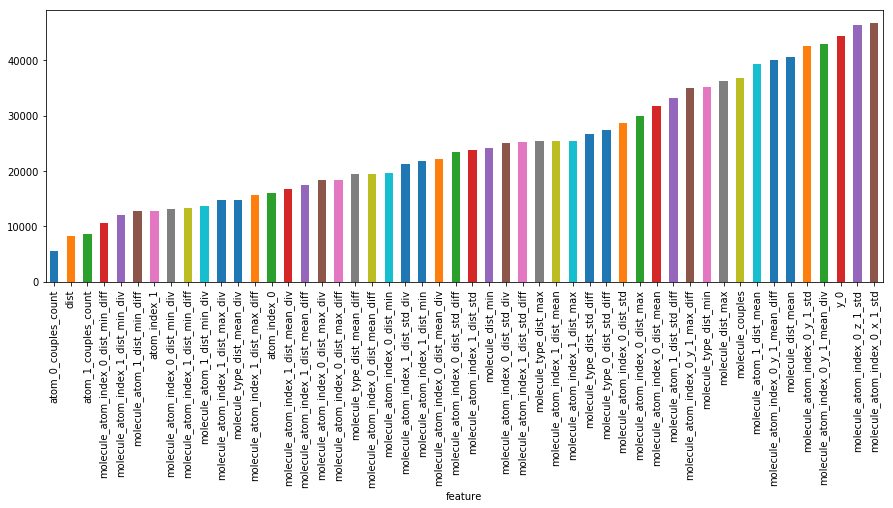

In [53]:
m008.groupby('feature').mean().sort_values('importance')['importance'].plot(kind='bar', figsize=(15, 5))

In [46]:
len(first_list * 5 * 8)

2000